In [1]:
import distract
import finetune
import importlib
import matplotlib.pyplot as plt
import numpy as np
importlib.reload(distract)
importlib.reload(finetune)

finetune.NUM_CLASSES = 196
finetune.CLASSIFIER_NAME = 'resnet'
finetune.NUM_EPOCHS = 15
finetune.FEATURE_EXTRACT = False
classifier = finetune.initialize_model()
# classifier, hist = finetune.finetune_model(classifier)

In [4]:
importlib.reload(distract)
distractor = distract.initialize_distractor(classifier)
print(distractor)

Distractor(
  (cnn): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)


In [5]:
importlib.reload(distract)

baseline_loss, distractor_loss = distract.train_distractor(distractor, classifier)

100%|██████████| 1006/1006 [05:59<00:00,  2.80it/s]


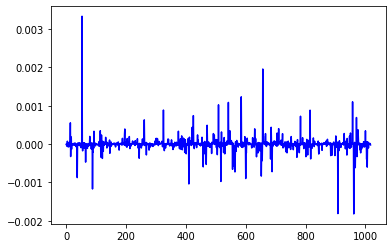

In [9]:
plt.plot(np.array([l.cpu().data.numpy() for l in baseline_loss['train']]) - np.array([l.cpu().data.numpy() for l in distractor_loss['train']]), 'b')
# plt.plot([l.cpu().data.numpy() for l in distractor_loss['train']], 'r')
# plt.plot(distractor_loss, 'r')
plt.show()

In [10]:
baseline_loss, distractor_loss = distract.train_distractor(distractor, classifier)

100%|██████████| 1006/1006 [06:22<00:00,  2.63it/s]


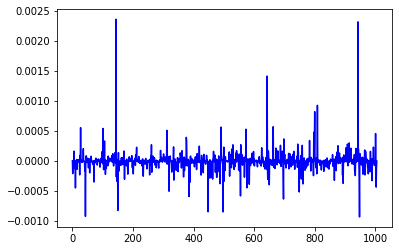

In [12]:
plt.plot(np.array([l.cpu().data.numpy() for l in baseline_loss['val']]) - np.array([l.cpu().data.numpy() for l in distractor_loss['val']]), 'b')
# plt.plot([l.cpu().data.numpy() for l in distractor_loss['train']], 'r')
# plt.plot(distractor_loss, 'r')
plt.show()